In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight') # For plots

In [ ]:
from scipy import stats

In [ ]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.4/819.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2

In [ ]:
from darts import TimeSeries
from darts.models import (
    NaiveSeasonal,
    NaiveMean,NaiveMovingAverage,
    NaiveDrift,
    ExponentialSmoothing,
    AutoARIMA,
    ARIMA,
    Theta,
    FFT
)

from darts.metrics import mase, mse, mae, ope, rmse, smape, r2_score

In [ ]:
bajaj_df = pd.read_csv('bajaj.csv')
bajaj_df

,Date,Price,Open,High,Low,Vol.,Change %
0,01/29/2024,"1,637.00","1,631.05","1,640.80","1,618.55",940.17K,0.42%
1,01/25/2024,"1,630.15","1,621.75","1,635.00","1,613.70",1.74M,0.57%
2,01/24/2024,"1,620.85","1,594.70","1,622.85","1,578.35",1.39M,2.42%
3,01/23/2024,"1,582.50","1,597.45","1,615.25","1,575.00",3.03M,0.09%
4,01/20/2024,"1,581.00","1,600.50","1,610.95","1,577.75",404.13K,-1.22%
...,...,...,...,...,...,...,...
3877,06/02/2008,67.49,63.86,68.67,61.11,22.88M,6.67%
3878,05/30/2008,63.27,63.11,65.63,57.80,31.12M,1.83%
3879,05/29/2008,62.13,64.51,69.07,59.73,46.03M,-1.33%
3880,05/28/2008,62.97,55.41,65.39,55.41,46.71M,15.56%


In [ ]:
bajaj_df = bajaj_df.drop_duplicates('Date', keep='last')
bajaj_df

,Date,Price,Open,High,Low,Vol.,Change %
0,01/29/2024,"1,637.00","1,631.05","1,640.80","1,618.55",940.17K,0.42%
1,01/25/2024,"1,630.15","1,621.75","1,635.00","1,613.70",1.74M,0.57%
2,01/24/2024,"1,620.85","1,594.70","1,622.85","1,578.35",1.39M,2.42%
3,01/23/2024,"1,582.50","1,597.45","1,615.25","1,575.00",3.03M,0.09%
4,01/20/2024,"1,581.00","1,600.50","1,610.95","1,577.75",404.13K,-1.22%
...,...,...,...,...,...,...,...
3877,06/02/2008,67.49,63.86,68.67,61.11,22.88M,6.67%
3878,05/30/2008,63.27,63.11,65.63,57.80,31.12M,1.83%
3879,05/29/2008,62.13,64.51,69.07,59.73,46.03M,-1.33%
3880,05/28/2008,62.97,55.41,65.39,55.41,46.71M,15.56%


In [ ]:
bajaj_df = bajaj_df.set_index('Date')
bajaj_df.index = pd.to_datetime(bajaj_df.index)

In [ ]:
bajaj_df.sort_index(inplace=True)

In [ ]:
bajaj_df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2008-05-27,54.49,49.61,60.02,48.25,44.27M,8.94%
2008-05-28,62.97,55.41,65.39,55.41,46.71M,15.56%
2008-05-29,62.13,64.51,69.07,59.73,46.03M,-1.33%
2008-05-30,63.27,63.11,65.63,57.80,31.12M,1.83%
2008-06-02,67.49,63.86,68.67,61.11,22.88M,6.67%
...,...,...,...,...,...,...
2024-01-20,"1,581.00","1,600.50","1,610.95","1,577.75",404.13K,-1.22%
2024-01-23,"1,582.50","1,597.45","1,615.25","1,575.00",3.03M,0.09%
2024-01-24,"1,620.85","1,594.70","1,622.85","1,578.35",1.39M,2.42%


In [ ]:
bajaj_df['Price'] = (bajaj_df['Price'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
bajaj_df['Open'] = (bajaj_df['Open'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
bajaj_df['High'] = (bajaj_df['High'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
bajaj_df['Low'] = (bajaj_df['Low'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
bajaj_df['Change %'] = (bajaj_df['Change %'].str.split()).apply(lambda x: float(x[0].replace('%', '')))
bajaj_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3882 entries, 2008-05-27 to 2024-01-29
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     3882 non-null   float64
 1   Open      3882 non-null   float64
 2   High      3882 non-null   float64
 3   Low       3882 non-null   float64
 4   Vol.      3882 non-null   object 
 5   Change %  3882 non-null   float64
dtypes: float64(5), object(1)
memory usage: 212.3+ KB


In [ ]:
df = bajaj_df[['Price', 'Open', 'High', 'Low']].copy()
df

,Price,Open,High,Low
Date,,,,
2008-05-27,54.49,49.61,60.02,48.25
2008-05-28,62.97,55.41,65.39,55.41
2008-05-29,62.13,64.51,69.07,59.73
2008-05-30,63.27,63.11,65.63,57.80
2008-06-02,67.49,63.86,68.67,61.11
...,...,...,...,...
2024-01-20,1581.00,1600.50,1610.95,1577.75
2024-01-23,1582.50,1597.45,1615.25,1575.00
2024-01-24,1620.85,1594.70,1622.85,1578.35


In [ ]:
returns = 100 * (df.pct_change()[1:]['Price'])
returns

Date
2008-05-28    15.562489
2008-05-29    -1.333969
2008-05-30     1.834862
2008-06-02     6.669828
2008-06-03    -2.163283
                ...    
2024-01-20    -1.218369
2024-01-23     0.094877
2024-01-24     2.423381
2024-01-25     0.573773
2024-01-29     0.420207
Name: Price, Length: 3881, dtype: float64

In [ ]:
df['Returns'] = returns

In [ ]:
df = df.dropna()


In [ ]:
print(df.fillna(method = 'ffill'))

              Price     Open     High      Low    Returns
Date                                                     
2008-05-28    62.97    55.41    65.39    55.41  15.562489
2008-05-29    62.13    64.51    69.07    59.73  -1.333969
2008-05-30    63.27    63.11    65.63    57.80   1.834862
2008-06-02    67.49    63.86    68.67    61.11   6.669828
2008-06-03    66.03    66.02    67.77    62.15  -2.163283
...             ...      ...      ...      ...        ...
2024-01-20  1581.00  1600.50  1610.95  1577.75  -1.218369
2024-01-23  1582.50  1597.45  1615.25  1575.00   0.094877
2024-01-24  1620.85  1594.70  1622.85  1578.35   2.423381
2024-01-25  1630.15  1621.75  1635.00  1613.70   0.573773
2024-01-29  1637.00  1631.05  1640.80  1618.55   0.420207

[3881 rows x 5 columns]


In [ ]:
df = df.resample('D').fillna(method='ffill')

In [ ]:
df

,Price,Open,High,Low,Returns
Date,,,,,
2008-05-28,62.97,55.41,65.39,55.41,15.562489
2008-05-29,62.13,64.51,69.07,59.73,-1.333969
2008-05-30,63.27,63.11,65.63,57.80,1.834862
2008-05-31,63.27,63.11,65.63,57.80,1.834862
2008-06-01,63.27,63.11,65.63,57.80,1.834862
...,...,...,...,...,...
2024-01-25,1630.15,1621.75,1635.00,1613.70,0.573773
2024-01-26,1630.15,1621.75,1635.00,1613.70,0.573773
2024-01-27,1630.15,1621.75,1635.00,1613.70,0.573773


In [ ]:
realz_vol = df['Returns'].rolling(5).std()
realz_vol

Date
2008-05-28         NaN
2008-05-29         NaN
2008-05-30         NaN
2008-05-31         NaN
2008-06-01    6.636859
                ...   
2024-01-25    1.507809
2024-01-26    1.306392
2024-01-27    0.904796
2024-01-28    0.827170
2024-01-29    0.068677
Freq: D, Name: Returns, Length: 5725, dtype: float64

In [ ]:
n = 200
split_date = df['Returns'].iloc[-n:].index

In [ ]:
split_date

DatetimeIndex(['2023-07-14', '2023-07-15', '2023-07-16', '2023-07-17',
               '2023-07-18', '2023-07-19', '2023-07-20', '2023-07-21',
               '2023-07-22', '2023-07-23',
               ...
               '2024-01-20', '2024-01-21', '2024-01-22', '2024-01-23',
               '2024-01-24', '2024-01-25', '2024-01-26', '2024-01-27',
               '2024-01-28', '2024-01-29'],
              dtype='datetime64[ns]', name='Date', length=200, freq='D')

In [ ]:
n = 200
split_date = returns.iloc[-n:].index

In [ ]:
split_date

DatetimeIndex(['2023-04-11', '2023-04-12', '2023-04-13', '2023-04-17',
               '2023-04-18', '2023-04-19', '2023-04-20', '2023-04-21',
               '2023-04-24', '2023-04-25',
               ...
               '2024-01-15', '2024-01-16', '2024-01-17', '2024-01-18',
               '2024-01-19', '2024-01-20', '2024-01-23', '2024-01-24',
               '2024-01-25', '2024-01-29'],
              dtype='datetime64[ns]', name='Date', length=200, freq=None)

In [ ]:
train_df = df.loc[:'2023-04-10'].reset_index(drop=False)
test_df = df.loc['2023-04-11':].reset_index(drop=False)

In [ ]:
train_df

,Date,Price,Open,High,Low,Returns
0,2008-05-28,62.97,55.41,65.39,55.41,15.562489
1,2008-05-29,62.13,64.51,69.07,59.73,-1.333969
2,2008-05-30,63.27,63.11,65.63,57.80,1.834862
3,2008-05-31,63.27,63.11,65.63,57.80,1.834862
4,2008-06-01,63.27,63.11,65.63,57.80,1.834862
...,...,...,...,...,...,...
5426,2023-04-06,1303.95,1279.30,1311.45,1271.35,1.926835
5427,2023-04-07,1303.95,1279.30,1311.45,1271.35,1.926835
5428,2023-04-08,1303.95,1279.30,1311.45,1271.35,1.926835
5429,2023-04-09,1303.95,1279.30,1311.45,1271.35,1.926835


In [ ]:
test_df

,Date,Price,Open,High,Low,Returns
0,2023-04-11,1323.20,1312.95,1325.0,1307.20,1.390751
1,2023-04-12,1321.55,1321.00,1329.0,1315.55,-0.124698
2,2023-04-13,1341.30,1320.90,1346.0,1318.00,1.494457
3,2023-04-14,1341.30,1320.90,1346.0,1318.00,1.494457
4,2023-04-15,1341.30,1320.90,1346.0,1318.00,1.494457
...,...,...,...,...,...,...
289,2024-01-25,1630.15,1621.75,1635.0,1613.70,0.573773
290,2024-01-26,1630.15,1621.75,1635.0,1613.70,0.573773
291,2024-01-27,1630.15,1621.75,1635.0,1613.70,0.573773
292,2024-01-28,1630.15,1621.75,1635.0,1613.70,0.573773


In [ ]:
train = train_df[['Date', 'Returns']]
test = test_df[['Date', 'Returns']]

In [ ]:
train = train.set_index('Date')
test = test.set_index('Date')

In [ ]:
train_tm = TimeSeries.from_series(train)
test_tm = TimeSeries.from_series(test)

##Naive forecast

In [ ]:
naive_model = NaiveSeasonal(K=1)

In [ ]:
naive_model.fit(train_tm)
y_pred = naive_model.predict(len(test_tm))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
from sklearn.metrics import make_scorer

# Metric used to measure the model (Root Mean Square Error)
def rmse1(y_actual, y_pred):
    rmse = np.sqrt(mean_squared_error(y_actual,y_pred))
    return rmse
rmse_cv = make_scorer(rmse, greater_is_better=False)

def mse1(y_actual, y_pred):
    mse = mean_squared_error(y_actual,y_pred)
    return mse
mse_cv = make_scorer(mse, greater_is_better=False)

def mae1(y_actual, y_pred):
    mae = mean_absolute_error(y_actual,y_pred)
    return mae
mae_cv = make_scorer(mae, greater_is_better=False)

def smape1(a, f):
    return 1/len(a) * np.sum(2*np.abs(f-a)/(np.abs(a)+np.abs(f))*100)

In [ ]:
print(rmse(test_tm, y_pred))
print(mse(test_tm, y_pred))
print(mae(test_tm, y_pred))
print(smape(test_tm, y_pred))

1.2401016785156576
1.5378521730573513
0.8632252244728817
169.2888642707057


In [ ]:
len(y_pred.values())

294

In [ ]:
test_df['Realized_vol'] = test_df['Returns'].rolling(5).std()

In [ ]:
test_df

,Date,Price,Open,High,Low,Returns,Realized_vol
0,2023-04-11,1323.20,1312.95,1325.0,1307.20,1.390751,NaN
1,2023-04-12,1321.55,1321.00,1329.0,1315.55,-0.124698,NaN
2,2023-04-13,1341.30,1320.90,1346.0,1318.00,1.494457,NaN
3,2023-04-14,1341.30,1320.90,1346.0,1318.00,1.494457,NaN
4,2023-04-15,1341.30,1320.90,1346.0,1318.00,1.494457,0.713927
...,...,...,...,...,...,...,...
289,2024-01-25,1630.15,1621.75,1635.0,1613.70,0.573773,1.507809
290,2024-01-26,1630.15,1621.75,1635.0,1613.70,0.573773,1.306392
291,2024-01-27,1630.15,1621.75,1635.0,1613.70,0.573773,0.904796
292,2024-01-28,1630.15,1621.75,1635.0,1613.70,0.573773,0.827170


In [ ]:
len(realz_vol.iloc[-len('2023-04-11'):])

10

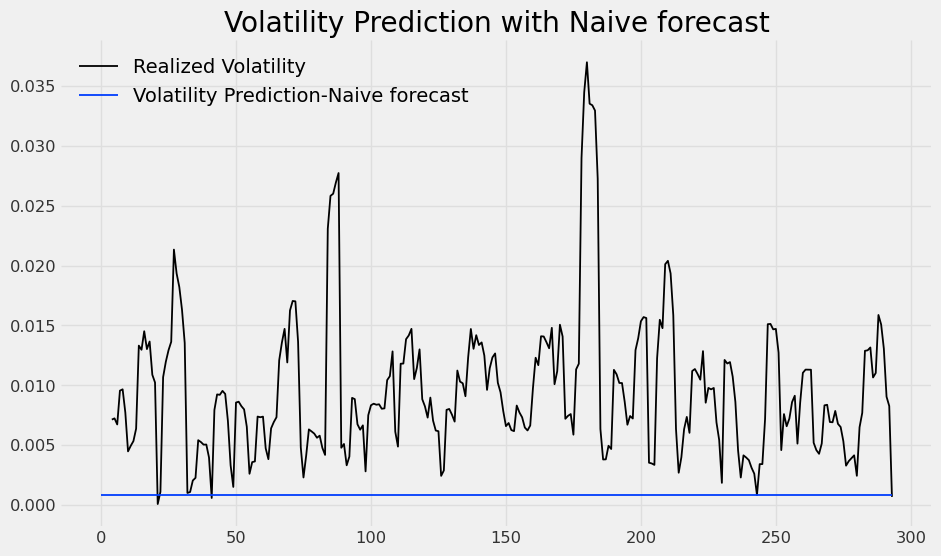

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test_df['Realized_vol']/100, label='Realized Volatility')
plt.plot(y_pred.values()/100, label='Volatility Prediction-Naive forecast')
plt.title('Volatility Prediction with Naive forecast')
plt.legend()
plt.show()

##Moving Average Forecast

In [ ]:
naive_model = NaiveMovingAverage()
naive_model.fit(train_tm)
y_pred_ma = naive_model.predict(len(test_tm))

In [ ]:
print(rmse(test_tm, y_pred_ma))
print(mse(test_tm, y_pred_ma))
print(mae(test_tm, y_pred_ma))
print(smape(test_tm, y_pred))

1.2401016785156576
1.5378521730573513
0.8632252244728817
169.2888642707057


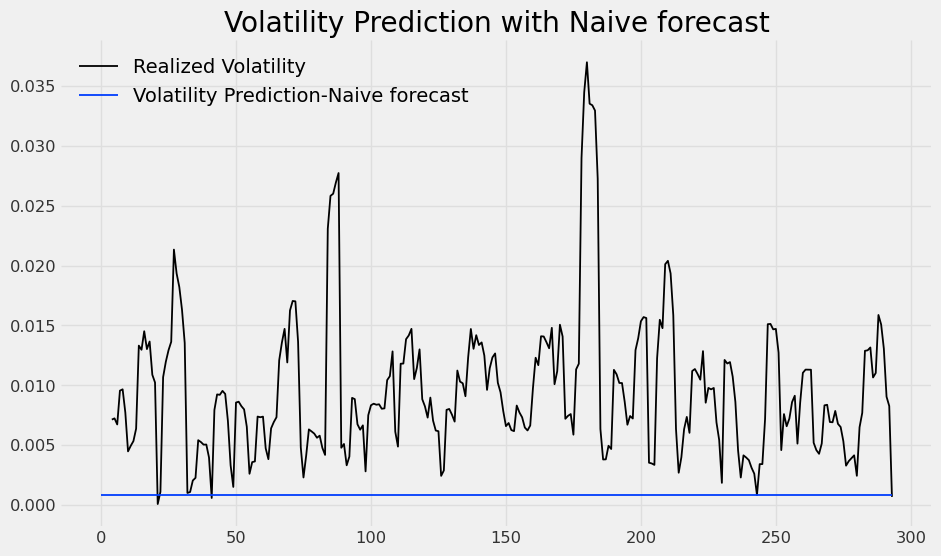

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test_df['Realized_vol']/100, label='Realized Volatility')
plt.plot(y_pred_ma.values()/100, label='Volatility Prediction-Naive forecast')
plt.title('Volatility Prediction with Naive forecast')
plt.legend()
plt.show()

In [ ]:
from darts.utils.statistics import check_seasonality

In [ ]:
check_seasonality(train_tm)

(True, 5)

##Holt-Winters Exponential Smoothing

In [ ]:
from darts.utils.utils import ModelMode, SeasonalityMode


In [ ]:
ets_model = ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=True, seasonal=ModelMode.ADDITIVE, seasonal_periods=5, random_state=42)

In [ ]:
ets_model.fit(train_tm)
y_pred_es = ets_model.predict(len(test_tm))

In [ ]:
print(rmse(test_tm, y_pred_es))
print(mse(test_tm, y_pred_es))
print(mae(test_tm, y_pred_es))
print(smape(test_tm, y_pred_es))

1.6222468518724475
2.6316848484100666
1.3527980587026196
139.80946847189543


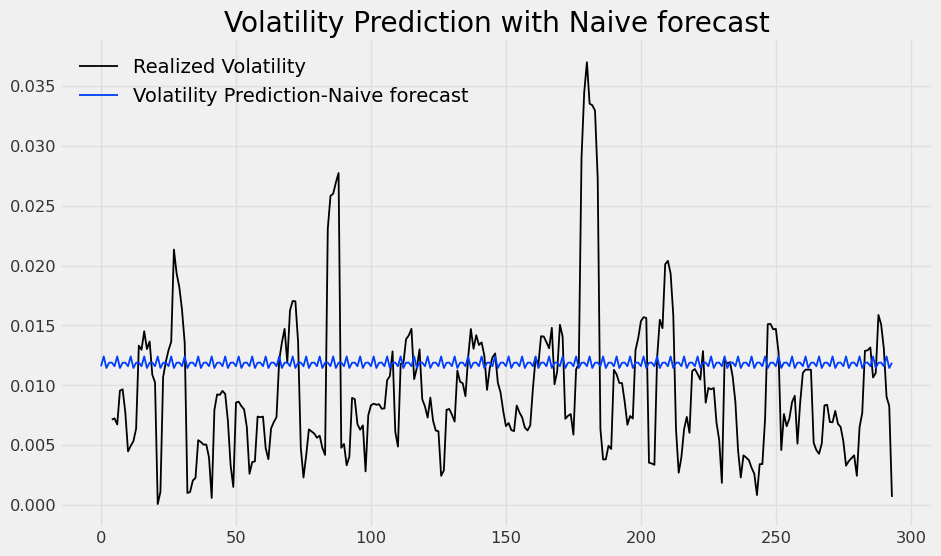

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test_df['Realized_vol']/100, label='Realized Volatility')
plt.plot(y_pred_es.values()/100, label='Volatility Prediction-Naive forecast')
plt.title('Volatility Prediction with Naive forecast')
plt.legend()
plt.show()

##ARIMA

In [ ]:
name = "ARIMA"
#Not using AutoARIMA because it just takes too much time for long time series
# arima_model = AutoARIMA(max_p=5, max_q=3, m=48, seasonal=False)
arima_model = ARIMA(p=2, d=1, q=1, seasonal_order=(1, 1, 1, 5))

In [ ]:
arima_model.fit(train_tm)
y_pred_arima = arima_model.predict(len(test_tm))

In [ ]:
print(rmse(test_tm, y_pred_arima))
print(mse(test_tm, y_pred_arima))
print(mae(test_tm, y_pred_arima))
print(smape(test_tm, y_pred_arima))

1.239778562321536
1.537050883592055
0.8627796052020631
164.9927885705783


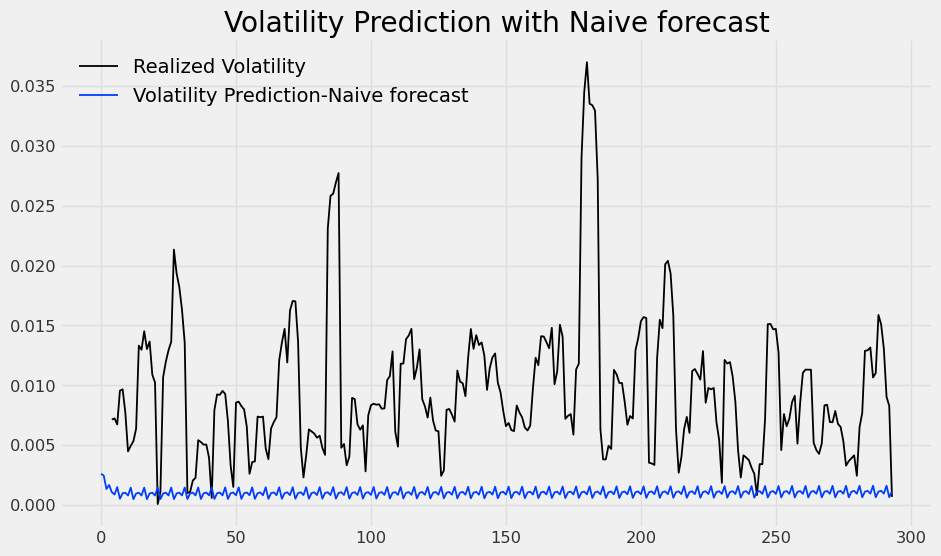

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test_df['Realized_vol']/100, label='Realized Volatility')
plt.plot(y_pred_arima.values()/100, label='Volatility Prediction-Naive forecast')
plt.title('Volatility Prediction with Naive forecast')
plt.legend()
plt.show()

##Theta forecast

In [ ]:
theta_model = Theta(theta=3, seasonality_period=5, season_mode=SeasonalityMode.ADDITIVE)

In [ ]:
theta_model.fit(train_tm)
y_pred_theta = theta_model.predict(len(test_tm))

In [ ]:
print(rmse(test_tm, y_pred_theta))
print(mse(test_tm, y_pred_theta))
print(mae(test_tm, y_pred_theta))
print(smape(test_tm, y_pred_theta))

1.6222295211677045
2.631628619348
1.3529121580714936
139.83219471066585


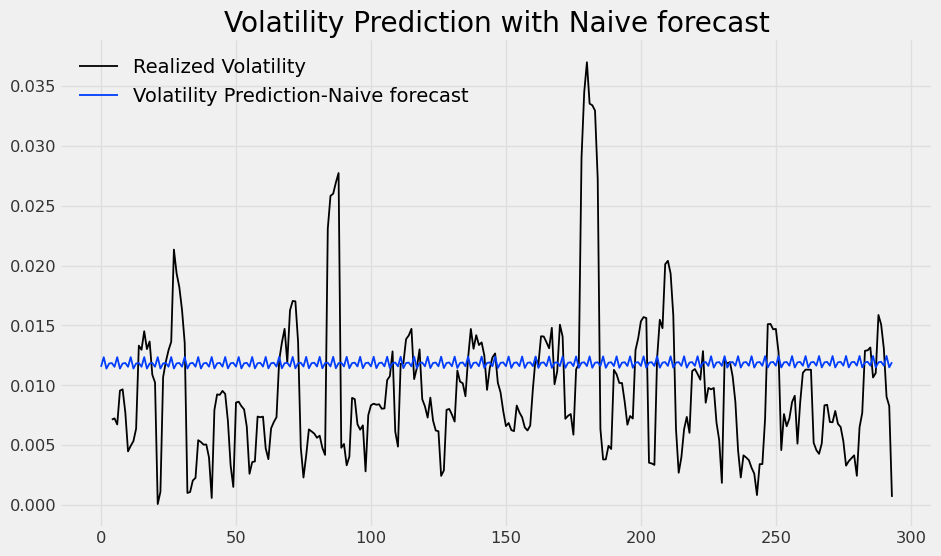

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test_df['Realized_vol']/100, label='Realized Volatility')
plt.plot(y_pred_theta.values()/100, label='Volatility Prediction-Naive forecast')
plt.title('Volatility Prediction with Naive forecast')
plt.legend()
plt.show()